In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
dp = pd.read_csv("diabetes_prediction_dataset.csv")

In [5]:
dp.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
# unique values in gender and smoking history
print(dp['gender'].unique())
print(dp['smoking_history'].unique())

['Female' 'Male' 'Other']
['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [4]:
# Remove any null values from the dataset if applicable Give statistical values (mean, mode, etc) for all the columns.

# Remove null values if any
dp.dropna(inplace=True)

# Display statistical values for all columns
print(dp.describe(include='all'))

        gender            age  hypertension  heart_disease smoking_history  \
count   100000  100000.000000  100000.00000  100000.000000          100000   
unique       3            NaN           NaN            NaN               6   
top     Female            NaN           NaN            NaN         No Info   
freq     58552            NaN           NaN            NaN           35816   
mean       NaN      41.885856       0.07485       0.039420             NaN   
std        NaN      22.516840       0.26315       0.194593             NaN   
min        NaN       0.080000       0.00000       0.000000             NaN   
25%        NaN      24.000000       0.00000       0.000000             NaN   
50%        NaN      43.000000       0.00000       0.000000             NaN   
75%        NaN      60.000000       0.00000       0.000000             NaN   
max        NaN      80.000000       1.00000       1.000000             NaN   

                  bmi    HbA1c_level  blood_glucose_level      

In [7]:
# one hot encode gender and smoking history

# One-hot encode 'gender'
gender_dummies = pd.get_dummies(dp['gender'], prefix='gender')
dp = pd.concat([dp, gender_dummies], axis=1)
dp.drop('gender', axis=1, inplace=True)

# One-hot encode 'smoking_history'
smoking_history_dummies = pd.get_dummies(dp['smoking_history'], prefix='smoking_history')
dp = pd.concat([dp, smoking_history_dummies], axis=1)
dp.drop('smoking_history', axis=1, inplace=True)

print(dp.head())

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Female  gender_Male  gender_Other  \
0         0           True        False         False   
1         0           True        False         False   
2         0          False         True         False   
3         0           True        False         False   
4         0          False         True         False   

   smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                    False                    False                 False   
1               

In [9]:
# Perform an 80-20 train-test split on the dataset
X = dp.drop('diabetes', axis=1)
y = dp['diabetes']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state for reproducibility

# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80000, 15)
X_test shape: (20000, 15)
y_train shape: (80000,)
y_test shape: (20000,)


Accuracy: 0.95295
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18292
           1       0.72      0.73      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000

Confusion Matrix:


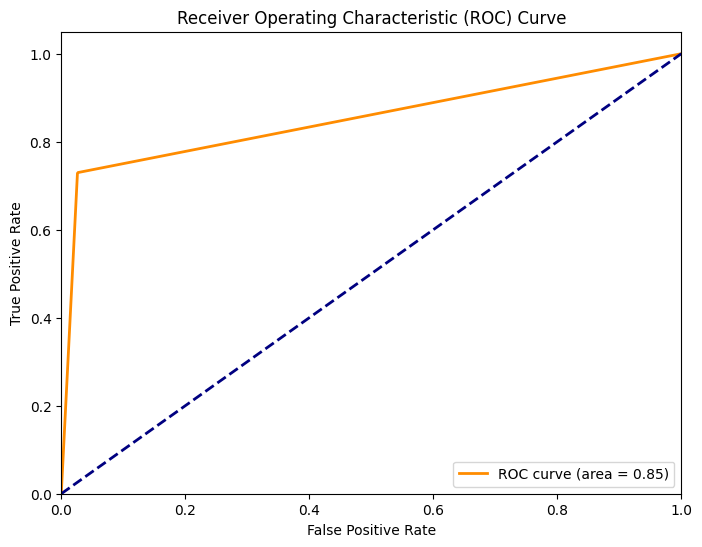

In [15]:
# Use a Decision Tree Classifier to classify the data based on the diabetes or not.

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)  # Set random_state for reproducibility

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix

# Predict probabilities for the positive class
y_prob = dt_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The Descision tree model achieves an accuracy of 95.29%, indicating it correctly classifies most instances related to diabetes. However, precision and recall vary between classes. For Class 0 (no diabetes), both precision and recall are 97%, demonstrating strong performance in correctly identifying non-diabetic patients. For Class 1 (diabetes), precision is 72% and recall is 73%, indicating the model struggles more with accurately predicting diabetic patients, resulting in false positives and false negatives. The F1-score for Class 1 is 73%, highlighting a moderate balance between precision and recall for identifying diabetes. The ROC curve shows an AUC of 0.85, suggesting a good, but not perfect, ability to differentiate between diabetic and non-diabetic patients. The performance imbalance may be due to the dataset being skewed towards non-diabetic instances. To improve the model’s sensitivity towards detecting diabetes, techniques like oversampling diabetic cases, undersampling non-diabetic cases, or adjusting class weights could be beneficial. Overall, while the model is effective at predicting non-diabetic patients, improvements are needed to enhance its ability to correctly identify individuals with diabetes, reducing false negatives and better supporting early detection efforts.

Random Forest Accuracy: 0.97005
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Random Forest Confusion Matrix:
[[18226    66]
 [  533  1175]]


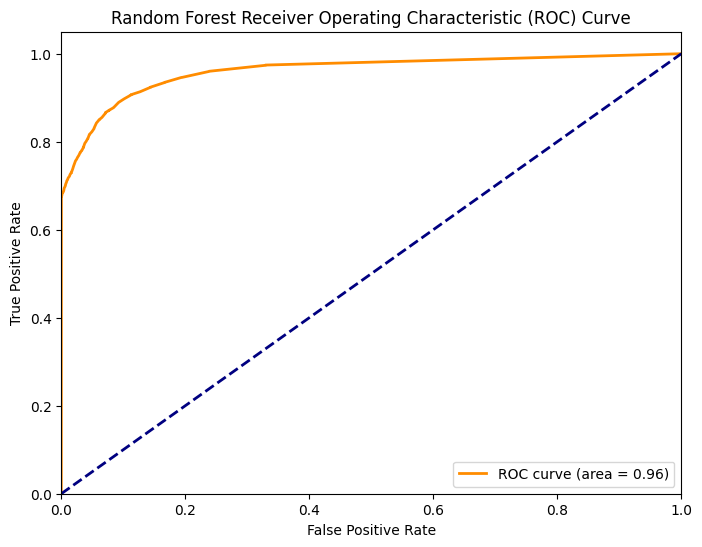

In [16]:
# Train a Random Forest Classifier on the dataset

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Generate a classification report
print(classification_report(y_test, y_pred_rf))

# Generate a confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)

# Predict probabilities for the positive class
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The Random Forest model achieves an accuracy of 97.01%, indicating that it correctly classifies most instances of diabetes and non-diabetes cases. For Class 0 (no diabetes), precision is 97% and recall is 100%, demonstrating a high level of accuracy in identifying non-diabetic patients with very few false negatives. For Class 1 (diabetes), the precision is 95%, meaning that the majority of predicted positive cases are accurate, while recall is 69%, indicating that the model misses a substantial portion of actual diabetic cases, leading to false negatives. The F1-score for Class 1 is 80%, highlighting a reasonable balance between precision and recall for detecting diabetic instances, but with some room for improvement in terms of sensitivity.

The ROC curve has an area under the curve (AUC) of 0.96, indicating excellent discriminative ability between diabetic and non-diabetic patients. However, the relatively low recall for Class 1 suggests that the model needs improvement in identifying all diabetic cases. This could potentially be enhanced by adjusting the class weights or using techniques like oversampling the diabetic cases to balance the dataset and improve recall, thereby reducing the number of false negatives and supporting early diagnosis of diabetes.

# classifier comparision

The **Random Forest** model outperforms the **Decision Tree** model based on several key metrics. The Random Forest achieves an accuracy of **97.01%**, higher than the Decision Tree's **95.29%**, indicating better overall performance. For Class 1 (diabetes), Random Forest shows significantly improved precision (**95%** vs. **72%** for Decision Tree), meaning fewer false positives. Although the recall for Class 1 is slightly lower at **69%** compared to **73%** for the Decision Tree, the Random Forest achieves a higher **F1-score** of **80%**, demonstrating a better balance between precision and recall. Additionally, the **AUC of 0.96** for the Random Forest model is higher than the Decision Tree’s **0.85**, showing superior discriminative ability between diabetic and non-diabetic cases. Random Forest's ensemble approach makes it more robust, reducing the overfitting that often affects Decision Trees. Overall, the improved precision, higher accuracy, better F1-score, and AUC value justify that the Random Forest model is a more effective classifier for this task.

## Question 2

In [17]:
#  On the same dataset as above perform the following. •	Split the data into 80-20 train-test ratio.

# Perform an 80-20 train-test split on the dataset
X = dp.drop('diabetes', axis=1)
y = dp['diabetes']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state for reproducibility

# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80000, 15)
X_test shape: (20000, 15)
y_train shape: (80000,)
y_test shape: (20000,)


Random Forest Accuracy: 0.97005
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Random Forest Confusion Matrix:
[[18226    66]
 [  533  1175]]


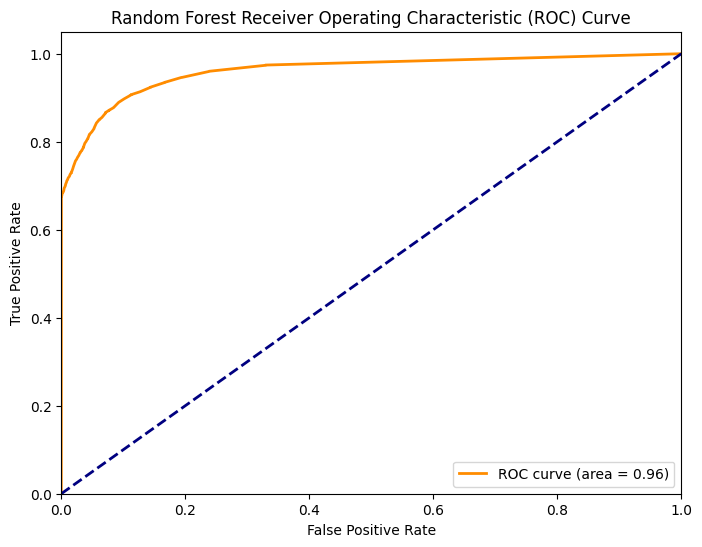

In [18]:
# Train a Random Forest classifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Generate a classification report
print(classification_report(y_test, y_pred_rf))

# Generate a confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)

# Predict probabilities for the positive class
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.9721
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.97      0.70      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000

AdaBoost Confusion Matrix:
[[18253    39]
 [  519  1189]]


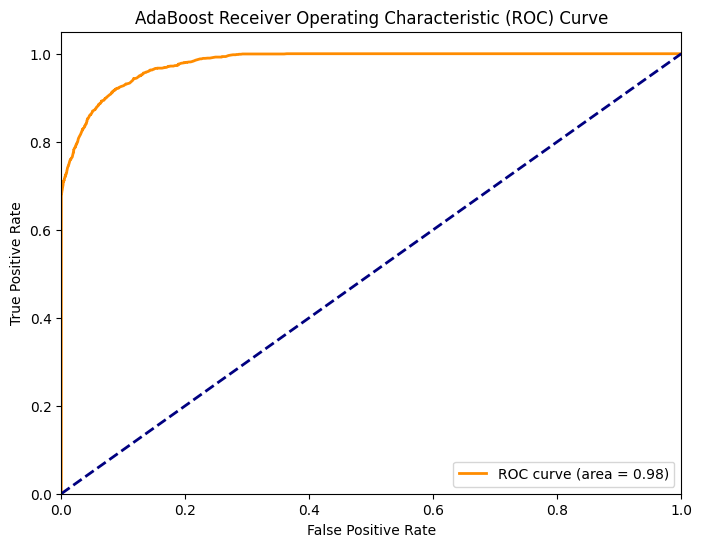

In [19]:
# Train a adaboost classifier.

from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost Classifier
ada_classifier = AdaBoostClassifier(random_state=42)

# Train the classifier
ada_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada = ada_classifier.predict(X_test)

# Evaluate the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada}")

# Generate a classification report
print(classification_report(y_test, y_pred_ada))

# Generate a confusion matrix
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
print("AdaBoost Confusion Matrix:")
print(conf_matrix_ada)

# Predict probabilities for the positive class
y_prob_ada = ada_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_prob_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Voting Classifier Accuracy: 0.96995
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Voting Classifier Confusion Matrix:
[[18223    69]
 [  532  1176]]


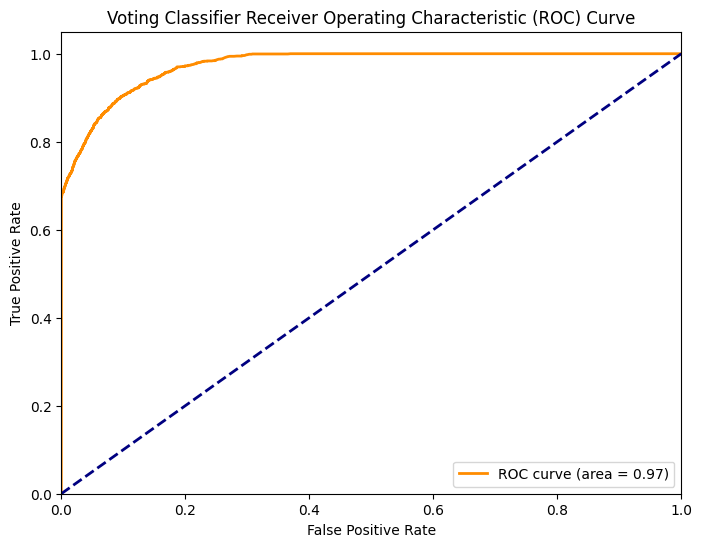

In [20]:
#  Create a Voting Classifier using the trained Random Forest and AdaBoost Classifier.

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('ada', ada_classifier)
], voting='soft') # 'soft' voting uses predicted probabilities

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Make predictions using the Voting Classifier
y_pred_voting = voting_classifier.predict(X_test)

# Evaluate the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting}")

# Generate a classification report
print(classification_report(y_test, y_pred_voting))

# Generate a confusion matrix
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
print("Voting Classifier Confusion Matrix:")
print(conf_matrix_voting)

# Predict probabilities for the positive class
y_prob_voting = voting_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_prob_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Voting Classifier Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The Voting Classifier model achieves an accuracy of 96.99%, indicating strong overall performance in correctly classifying both diabetic and non-diabetic instances. For Class 0 (non-diabetic), precision is 97% and recall is 100%, demonstrating the model’s capability to almost perfectly identify non-diabetic patients without false negatives. For Class 1 (diabetic), the precision is 94%, suggesting that most predictions for diabetes are accurate, minimizing false positives. However, the recall for Class 1 is 69%, indicating that the model misses a significant number of actual diabetic cases, resulting in false negatives. The F1-score for Class 1 is 80%, showing a reasonable balance between precision and recall, although the lower recall reduces its effectiveness in identifying all diabetic instances. The AUC of 0.97 signifies excellent discriminative ability. To further improve the model’s performance in detecting diabetes, enhancing the recall could be achieved by adjusting decision thresholds or employing techniques to address class imbalance, thus reducing missed diagnoses and improving the model’s effectiveness in real-world medical scenarios.

#	What is a Voting Classifier? Explain how it works in detail.

A Voting Classifier is an ensemble machine learning model that combines the predictions of multiple individual classifiers to make a final prediction.  It works by training several different base classifiers (like Decision Trees, Random Forests, or Support Vector Machines) on the same dataset.  When presented with a new data point, each base classifier generates its own prediction.  In "hard" voting, the final prediction is the class label that is predicted by the majority of the base classifiers. In "soft" voting, each classifier provides a probability distribution over the possible class labels, and these probabilities are averaged across the classifiers. The final prediction is the class label with the highest average predicted probability.  This averaging of predictions often leads to more accurate and robust predictions compared to a single classifier, especially when the base classifiers have different strengths and weaknesses.


#	Describe the difference between Soft Voting and Hard Voting.

# Hard Voting:
In hard voting, each classifier votes for a class, and the class with the most votes wins.
It's like a simple majority vote.  The final prediction is the class label that the majority of the base classifiers predict.

# Soft Voting:
In soft voting, each classifier outputs the probability of each class.  
The probabilities are averaged across all classifiers, and the class with the highest average probability is selected.
Soft voting generally performs better than hard voting because it considers the confidence level of each classifier's prediction.  
A classifier that is highly confident in its prediction will have a greater influence on the final prediction.